In [1]:
import h5py
import json
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from reV.handlers.exclusions import ExclusionLayers
from reV.exclusions.exclusions import LayerMask, InclusionMask

excl_h5 = '/Users/mrossol/Git_Repos/reV/tests/data/ri_exclusions/ri_exclusions.h5'

In [2]:
with h5py.File(excl_h5, 'r') as f:
    print(list(f))
    data = f['ri_padus'][...]

['meta', 'ri_padus', 'ri_reeds_regions', 'ri_smod', 'ri_srtm_slope']


In [2]:
ri_padus = LayerMask('ri_padus', exclude_values=[1,])
ri_slope = LayerMask('ri_srtm_slope', inclusion_range=(None, 5))

mask_1 = InclusionMask(excl_h5, ri_padus, ri_slope).mask.astype(int)
mask_2 = InclusionMask(excl_h5, ri_padus, ri_slope, min_area=1).mask.astype(int)

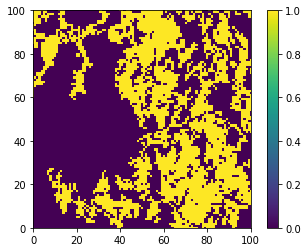

In [3]:
plt.imshow(mask_2)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.colorbar()
plt.show()

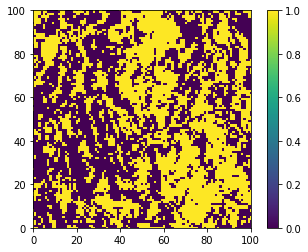

In [4]:
plt.imshow(mask_1)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.colorbar()
plt.show()